In [1]:
'''
OLS using stats models
'''



import xarray as xr
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

fileName = 'tang_JASO_atl_0_90.nc'
fileName = 'speed_JASO_atl_0_90.nc'


ds = xr.open_dataset(fileName)
print(ds)

Data  = ds.Data
Time  = ds.Fracyear

#Data  = ds.yearly
#Time  = ds.years


<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 34146, ncl6: 34146, ncl7: 54, ncl8: 54, storm: 34146)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [2]:
# add a constant = 1 
df = pd.DataFrame({'Time':Time, 'Data':Data, 'const':1})
#print (df)

In [3]:
reg1 = sm.OLS(endog=df['Data'], exog=df[['const', 'Time']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [4]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [5]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.97
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           0.000109
Time:                        20:58:40   Log-Likelihood:            -1.3403e+05
No. Observations:               34146   AIC:                         2.681e+05
Df Residuals:                   34144   BIC:                         2.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7905      8.158      6.471      0.0

In [6]:
'''
compare with scipy linear regression:
'''
from scipy import stats

Data  = ds.Data
Time  = ds.Fracyear
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)

print ("r-squared:", r_value**2)
print ("slope:", slope)
print ("p value:", p_value)




r-squared: 0.0004383852686438925
slope: -0.015832025571748676
p value: 0.00010915945123624268


(-60.0, 60.0)

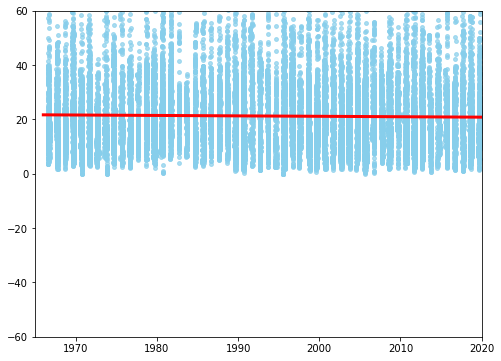

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(1966,2021,1)
get_y = lambda a, b: a + b * x


ymin = -60.
ymax =  60.

y = get_y(intercept,slope)

ax.scatter(Time, Data, s=15, color='skyblue',alpha=.7)
ax.plot(x, y, color='red', linewidth=3, label='OLS')

ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))
